In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('temp.csv')

In [3]:
df.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [4]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [5]:
dataset = df[['year','month','day','hour','DEWP','TEMP','PRES','Iws','Is','Ir']]

In [6]:
from collections import Counter
cut = int(dataset.shape[0]*0.8)
train = dataset.loc[:cut]
test = dataset.loc[cut:]

train = train.drop(['year'], axis=1)
test = test.drop(['year'], axis=1)

In [7]:
for s in range(1,25):
    train['shift_{}'.format(s)] = train['TEMP'].shift(s)
    test['shift_{}'.format(s)] = test['TEMP'].shift(s)

In [8]:
X_train = train.dropna().drop('TEMP', axis=1)
y_train = train.dropna()[['TEMP']]

X_test = test.dropna().drop('TEMP', axis=1)
y_test = test.dropna()[['TEMP']]

X_train_sc = StandardScaler().fit_transform(X_train)
y_train_sc = StandardScaler().fit_transform(y_train)

X_test_sc = StandardScaler().fit_transform(X_test)
y_test_sc = StandardScaler().fit_transform(y_test)

In [9]:
train.to_csv('train.csv')

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from keras import regularizers
import keras.backend as K

/Users/fatmakursun/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
## Hyperparameter for Deep Learning
learning_rate = 0.01
training_epochs = 200
display_step = 200
factor = 0.10
batch = 128
seed = 7
beta_1 = 0.9
beta_2 = 0.999
epsilon = None
decay = 0.001
np.random.seed(seed)
dims = X_train_sc.shape[1]

In [12]:
model = Sequential()
model.add(Dense(128,
                input_shape=(dims,),
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total para

In [13]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate))
history = model.fit(X_train_sc,y_train_sc,
                    batch_size=batch,
                    epochs=training_epochs,
                    validation_data=(X_test_sc, y_test_sc)) 

Train on 35036 samples, validate on 8741 samples
Epoch 1/200
35036/35036 [==============================] - 2s 48us/step - loss: 0.1928 - val_loss: 0.0557
Epoch 2/200
35036/35036 [==============================] - 1s 30us/step - loss: 0.0948 - val_loss: 0.0573
Epoch 3/200
35036/35036 [==============================] - 1s 30us/step - loss: 0.0933 - val_loss: 0.0506
Epoch 4/200
35036/35036 [==============================] - 1s 30us/step - loss: 0.0936 - val_loss: 0.0620
Epoch 5/200
35036/35036 [==============================] - 1s 30us/step - loss: 0.0936 - val_loss: 0.0795
Epoch 6/200
35036/35036 [==============================] - 1s 30us/step - loss: 0.0972 - val_loss: 0.0627
Epoch 7/200
35036/35036 [==============================] - 1s 31us/step - loss: 0.0931 - val_loss: 0.0509
Epoch 8/200
35036/35036 [==============================] - 1s 30us/step - loss: 0.0949 - val_loss: 0.0555
Epoch 9/200
35036/35036 [==============================] - 1s 29us/step - loss: 0.0980 - val_loss: 0.08

35036/35036 [==============================] - 2s 52us/step - loss: 0.0914 - val_loss: 0.1704
Epoch 78/200
35036/35036 [==============================] - 2s 51us/step - loss: 0.0907 - val_loss: 0.1294
Epoch 79/200
35036/35036 [==============================] - 2s 51us/step - loss: 0.0920 - val_loss: 0.1451
Epoch 80/200
35036/35036 [==============================] - 2s 49us/step - loss: 0.0876 - val_loss: 0.1305
Epoch 81/200
35036/35036 [==============================] - 2s 50us/step - loss: 0.0923 - val_loss: 0.1545
Epoch 82/200
35036/35036 [==============================] - 2s 46us/step - loss: 0.0907 - val_loss: 0.2093
Epoch 83/200
35036/35036 [==============================] - 2s 49us/step - loss: 0.0911 - val_loss: 0.1125
Epoch 84/200
35036/35036 [==============================] - 2s 48us/step - loss: 0.0921 - val_loss: 0.1371
Epoch 85/200
35036/35036 [==============================] - 2s 52us/step - loss: 0.0921 - val_loss: 0.1223
Epoch 86/200
35036/35036 [========================

35036/35036 [==============================] - 2s 51us/step - loss: 0.0956 - val_loss: 0.2356
Epoch 154/200
35036/35036 [==============================] - 2s 53us/step - loss: 0.0963 - val_loss: 0.2160
Epoch 155/200
35036/35036 [==============================] - 2s 59us/step - loss: 0.0961 - val_loss: 0.2483
Epoch 156/200
35036/35036 [==============================] - 2s 49us/step - loss: 0.1036 - val_loss: 0.2023
Epoch 157/200
35036/35036 [==============================] - 2s 49us/step - loss: 0.0872 - val_loss: 0.2920
Epoch 158/200
35036/35036 [==============================] - 2s 52us/step - loss: 0.0900 - val_loss: 0.3016
Epoch 159/200
35036/35036 [==============================] - 2s 52us/step - loss: 0.0909 - val_loss: 0.1626
Epoch 160/200
35036/35036 [==============================] - 2s 51us/step - loss: 0.0949 - val_loss: 0.2435
Epoch 161/200
35036/35036 [==============================] - 2s 50us/step - loss: 0.0959 - val_loss: 0.2456
Epoch 162/200
35036/35036 [===============

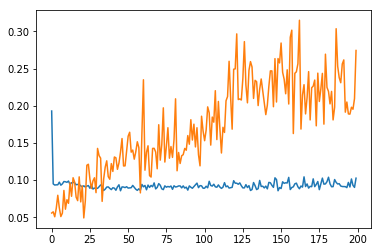

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

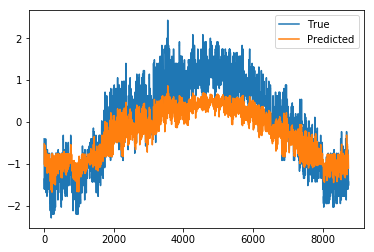

In [15]:
y_pred = model.predict(X_test_sc)
plt.plot(y_test_sc, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()

## Time Series LSTM

In [16]:
X_tr_t = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])
X_tst_t = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

In [17]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(68, input_shape=(1, dims),
                    activation='relu',kernel_initializer='lecun_uniform',
                    return_sequences=False,
                    kernel_regularizer=regularizers.l2(0.01)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate))
history_model_lstm = model_lstm.fit(X_tr_t,y_train_sc,epochs=training_epochs,
                                    batch_size=batch,verbose=1,shuffle=True,
                                    validation_data=(X_tst_t, y_test_sc))

Train on 35036 samples, validate on 8741 samples
Epoch 1/200
35036/35036 [==============================] - 5s 137us/step - loss: 0.2120 - val_loss: 0.0262
Epoch 2/200
35036/35036 [==============================] - 2s 70us/step - loss: 0.0229 - val_loss: 0.0249
Epoch 3/200
35036/35036 [==============================] - 3s 78us/step - loss: 0.0210 - val_loss: 0.0231
Epoch 4/200
35036/35036 [==============================] - 2s 70us/step - loss: 0.0188 - val_loss: 0.0174
Epoch 5/200
35036/35036 [==============================] - 3s 72us/step - loss: 0.0169 - val_loss: 0.0165
Epoch 6/200
35036/35036 [==============================] - 2s 69us/step - loss: 0.0169 - val_loss: 0.0160
Epoch 7/200
35036/35036 [==============================] - 2s 69us/step - loss: 0.0165 - val_loss: 0.0171
Epoch 8/200
35036/35036 [==============================] - 2s 67us/step - loss: 0.0154 - val_loss: 0.0166
Epoch 9/200
35036/35036 [==============================] - 2s 67us/step - loss: 0.0162 - val_loss: 0.0

35036/35036 [==============================] - 2s 66us/step - loss: 0.0137 - val_loss: 0.0172
Epoch 78/200
35036/35036 [==============================] - 2s 65us/step - loss: 0.0130 - val_loss: 0.0168
Epoch 79/200
35036/35036 [==============================] - 2s 66us/step - loss: 0.0139 - val_loss: 0.0147
Epoch 80/200
35036/35036 [==============================] - 2s 65us/step - loss: 0.0125 - val_loss: 0.0144
Epoch 81/200
35036/35036 [==============================] - 2s 66us/step - loss: 0.0132 - val_loss: 0.0151
Epoch 82/200
35036/35036 [==============================] - 2s 66us/step - loss: 0.0135 - val_loss: 0.0146
Epoch 83/200
35036/35036 [==============================] - 2s 69us/step - loss: 0.0140 - val_loss: 0.0137
Epoch 84/200
35036/35036 [==============================] - 2s 64us/step - loss: 0.0127 - val_loss: 0.0157
Epoch 85/200
35036/35036 [==============================] - 2s 63us/step - loss: 0.0137 - val_loss: 0.0149
Epoch 86/200
35036/35036 [========================

35036/35036 [==============================] - 2s 57us/step - loss: 0.0129 - val_loss: 0.0238
Epoch 154/200
35036/35036 [==============================] - 2s 53us/step - loss: 0.0141 - val_loss: 0.0180
Epoch 155/200
35036/35036 [==============================] - 2s 52us/step - loss: 0.0130 - val_loss: 0.0159
Epoch 156/200
35036/35036 [==============================] - 2s 54us/step - loss: 0.0140 - val_loss: 0.0199
Epoch 157/200
35036/35036 [==============================] - 2s 53us/step - loss: 0.0136 - val_loss: 0.0149
Epoch 158/200
35036/35036 [==============================] - 2s 61us/step - loss: 0.0128 - val_loss: 0.0145
Epoch 159/200
35036/35036 [==============================] - 2s 51us/step - loss: 0.0130 - val_loss: 0.0144
Epoch 160/200
35036/35036 [==============================] - 2s 52us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 161/200
35036/35036 [==============================] - 2s 48us/step - loss: 0.0137 - val_loss: 0.0173
Epoch 162/200
35036/35036 [===============

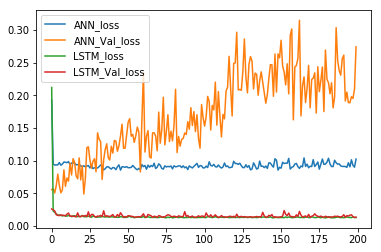

In [18]:
plt.plot(history.history['loss'], label='ANN_loss')
plt.plot(history.history['val_loss'], label='ANN_Val_loss')
plt.plot(history_model_lstm.history['loss'], label='LSTM_loss')
plt.plot(history_model_lstm.history['val_loss'], label='LSTM_Val_loss')
plt.legend()

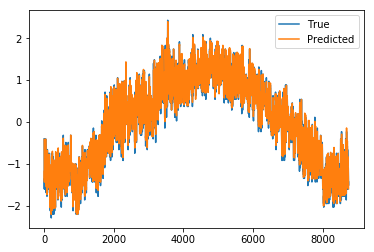

In [19]:
y_pred_lstm = model_lstm.predict(X_tst_t)
plt.plot(y_test_sc, label='True')
plt.plot(y_pred_lstm, label='Predicted')
plt.legend()

### Predicting Multiple Values

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv('temp.csv')

In [22]:
dataset = df[['year','month','day','hour','DEWP','TEMP','PRES','Iws','Is','Ir']]
from collections import Counter
cut = int(dataset.shape[0]*0.8)
train = dataset.loc[:cut]
test = dataset.loc[cut:]

train = train.drop(['year'], axis=1)
test = test.drop(['year'], axis=1)
for s in range(1,25):
    train['shift_{}'.format(s)] = train['TEMP'].shift(s)
    test['shift_{}'.format(s)] = test['TEMP'].shift(s)

for i in range(-1,-25,-1):
    train['lag_{}'.format(i)] = train['TEMP'].shift(i)
    test['lag_{}'.format(i)] = test['TEMP'].shift(i)

train = train.drop('TEMP', axis=1)
test = test.drop('TEMP', axis=1)

In [23]:
target_vars = ['lag_-1','lag_-2','lag_-3','lag_-4',
               'lag_-5','lag_-6','lag_-7','lag_-8',
               'lag_-9','lag_-10','lag_-11','lag_-12',
               'lag_-13','lag_-14','lag_-15','lag_-16',
               'lag_-17','lag_-18','lag_-19','lag_-20',
               'lag_-21','lag_-22','lag_-23','lag_-24']
X_train = train.dropna().drop(target_vars, axis=1)
y_train = train.dropna()[target_vars]

X_test = test.dropna().drop(target_vars, axis=1)
y_test = test.dropna()[target_vars]

X_train_sc = StandardScaler().fit_transform(X_train)
y_train_sc = StandardScaler().fit_transform(y_train)

X_test_sc = StandardScaler().fit_transform(X_test)
y_test_sc = StandardScaler().fit_transform(y_test)

In [24]:
X_tr_t = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])

X_tst_t = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from keras import regularizers
import keras.backend as K

In [26]:
## Hyperparameter for Deep Learning
learning_rate = 0.01
training_epochs = 500
display_step = 200
factor = 0.10
batch = 128
seed = 7
beta_1 = 0.9
beta_2 = 0.999
epsilon = None
decay = 0.001
np.random.seed(seed)
dims = X_train_sc.shape[1]

In [27]:
K.clear_session()
model_lag = Sequential()
model_lag.add(LSTM(68, input_shape=(1, dims),
                    activation='relu',kernel_initializer='lecun_uniform',
                    return_sequences=False,
                    kernel_regularizer=regularizers.l2(0.01)))
model_lag.add(Dense(y_train_sc.shape[1]))
model_lag.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate))
history_model_lag = model_lag.fit(X_tr_t,y_train_sc,epochs=training_epochs,
                                    batch_size=batch,verbose=1,shuffle=True,
                                    validation_data=(X_tst_t, y_test_sc))

Train on 35012 samples, validate on 8717 samples
Epoch 1/500
35012/35012 [==============================] - 2s 45us/step - loss: 0.2028 - val_loss: 0.0788
Epoch 2/500
35012/35012 [==============================] - 1s 25us/step - loss: 0.0702 - val_loss: 0.0821
Epoch 3/500
35012/35012 [==============================] - 1s 26us/step - loss: 0.0706 - val_loss: 0.0836
Epoch 4/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0671 - val_loss: 0.0693
Epoch 5/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0677 - val_loss: 0.0760
Epoch 6/500
35012/35012 [==============================] - 1s 26us/step - loss: 0.0662 - val_loss: 0.0743
Epoch 7/500
35012/35012 [==============================] - 1s 32us/step - loss: 0.0647 - val_loss: 0.0701
Epoch 8/500
35012/35012 [==============================] - 1s 26us/step - loss: 0.0658 - val_loss: 0.0749
Epoch 9/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0645 - val_loss: 0.07

35012/35012 [==============================] - 1s 27us/step - loss: 0.0592 - val_loss: 0.0661
Epoch 78/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0583 - val_loss: 0.0685
Epoch 79/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0584 - val_loss: 0.0655
Epoch 80/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0587 - val_loss: 0.0669
Epoch 81/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0584 - val_loss: 0.0644
Epoch 82/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0591 - val_loss: 0.0678
Epoch 83/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0586 - val_loss: 0.0671
Epoch 84/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0583 - val_loss: 0.0706
Epoch 85/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0583 - val_loss: 0.0668
Epoch 86/500
35012/35012 [========================

35012/35012 [==============================] - 1s 30us/step - loss: 0.0582 - val_loss: 0.0644
Epoch 154/500
35012/35012 [==============================] - 1s 30us/step - loss: 0.0585 - val_loss: 0.0666
Epoch 155/500
35012/35012 [==============================] - 1s 30us/step - loss: 0.0584 - val_loss: 0.0673
Epoch 156/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0588 - val_loss: 0.0664
Epoch 157/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0585 - val_loss: 0.0644
Epoch 158/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0587 - val_loss: 0.0663
Epoch 159/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0589 - val_loss: 0.0656
Epoch 160/500
35012/35012 [==============================] - 1s 30us/step - loss: 0.0578 - val_loss: 0.0665
Epoch 161/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0591 - val_loss: 0.0669
Epoch 162/500
35012/35012 [===============

Epoch 229/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0585 - val_loss: 0.0641
Epoch 230/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0589 - val_loss: 0.0657
Epoch 231/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0585 - val_loss: 0.0659
Epoch 232/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0587 - val_loss: 0.0653
Epoch 233/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0582 - val_loss: 0.0658
Epoch 234/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0584 - val_loss: 0.0652
Epoch 235/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0580 - val_loss: 0.0665
Epoch 236/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0584 - val_loss: 0.0703
Epoch 237/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0583 - val_loss: 0.0676
Epoch 238/500
35012/35012 [=

Epoch 305/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0582 - val_loss: 0.0659
Epoch 306/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0588 - val_loss: 0.0700
Epoch 307/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0585 - val_loss: 0.0675
Epoch 308/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0582 - val_loss: 0.0658
Epoch 309/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0579 - val_loss: 0.0654
Epoch 310/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0582 - val_loss: 0.0644
Epoch 311/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0585 - val_loss: 0.0641
Epoch 312/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0582 - val_loss: 0.0667
Epoch 313/500
35012/35012 [==============================] - 1s 27us/step - loss: 0.0593 - val_loss: 0.0659
Epoch 314/500
35012/35012 [=

Epoch 381/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0595 - val_loss: 0.0655
Epoch 382/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0579 - val_loss: 0.0652
Epoch 383/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0585 - val_loss: 0.0649
Epoch 384/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0583 - val_loss: 0.0655
Epoch 385/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0580 - val_loss: 0.0705
Epoch 386/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0585 - val_loss: 0.0660
Epoch 387/500
35012/35012 [==============================] - 1s 28us/step - loss: 0.0586 - val_loss: 0.0660
Epoch 388/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0588 - val_loss: 0.0646
Epoch 389/500
35012/35012 [==============================] - 1s 30us/step - loss: 0.0580 - val_loss: 0.0643
Epoch 390/500
35012/35012 [=

Epoch 457/500
35012/35012 [==============================] - 1s 30us/step - loss: 0.0589 - val_loss: 0.0633
Epoch 458/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0587 - val_loss: 0.0730
Epoch 459/500
35012/35012 [==============================] - 1s 29us/step - loss: 0.0586 - val_loss: 0.0656
Epoch 460/500
35012/35012 [==============================] - 1s 30us/step - loss: 0.0581 - val_loss: 0.0657
Epoch 461/500
35012/35012 [==============================] - 1s 30us/step - loss: 0.0581 - val_loss: 0.0666
Epoch 462/500
35012/35012 [==============================] - 1s 30us/step - loss: 0.0591 - val_loss: 0.0658
Epoch 463/500
35012/35012 [==============================] - 1s 32us/step - loss: 0.0582 - val_loss: 0.0671
Epoch 464/500
35012/35012 [==============================] - 1s 30us/step - loss: 0.0586 - val_loss: 0.0645
Epoch 465/500
35012/35012 [==============================] - 1s 31us/step - loss: 0.0585 - val_loss: 0.0681
Epoch 466/500
35012/35012 [=

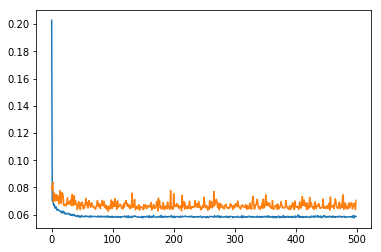

In [28]:
plt.plot(history_model_lag.history['loss'])
plt.plot(history_model_lag.history['val_loss'])

In [29]:
pred= model_lag.predict(X_tr_t)

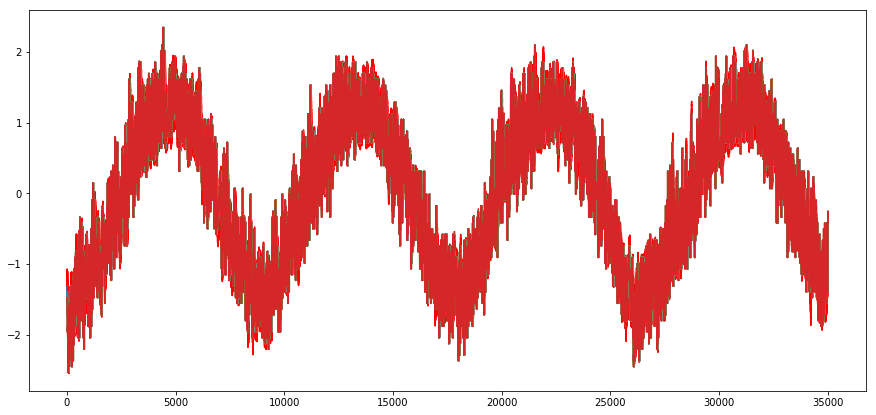

In [31]:
plt.figure(figsize=(15,7))
plt.plot(pred, 'r--')
plt.plot(y_train_sc)
plt.show()

In [32]:
beg=550


selected_input = X_tst_t[beg:beg+1,:,:]
real_output = y_test_sc[beg:beg+1]
predicted_output = model_lag.predict(selected_input)



predicted_output=np.transpose(predicted_output)
real_output=np.transpose(real_output)


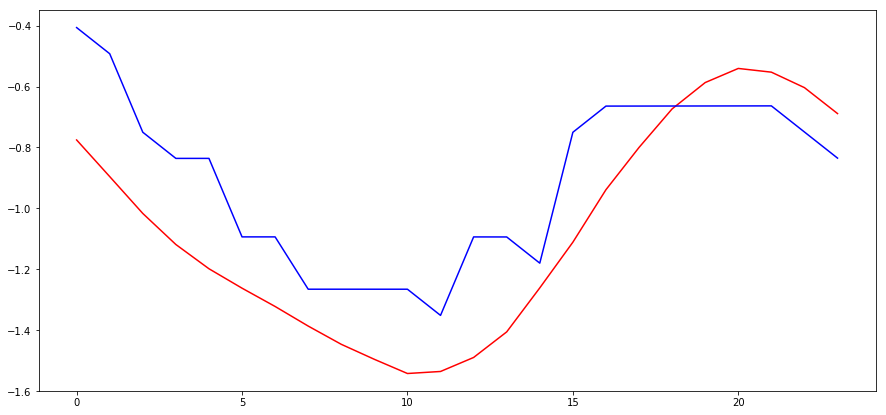

In [33]:
plt.figure(figsize=(15,7))
plt.plot(predicted_output,'r')
plt.plot(real_output, 'b')
plt.show()